In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import plotly.offline as py 
import plotly.graph_objs as go 
%matplotlib inline
import random

# Resources

- [Source of D3 planarity game](https://www.jasondavies.com/planarity/planarity.js)
    - my jsfiddle: https://jsfiddle.net/Thegreatmochi/0wrtb8qk/30/
    - Uses: [Stackoverflow: "How do you detect where two line segments intersect?"](https://stackoverflow.com/questions/563198/how-do-you-detect-where-two-line-segments-intersect/565282#565282)
- [Tantalo planarity algorithm](http://johntantalo.com/wiki/Planarity/)
    - https://github.com/tantalor/raphael.planarity
- ["stackoverflow: generate-a-large-random-planar-graph"](https://stackoverflow.com/questions/3232048/generate-a-large-random-planar-graph)
    - Includes ["UNIFORM RANDOM SAMPLING OF PLANAR GRAPHS IN LINEAR TIME"](http://www.lix.polytechnique.fr/~fusy/Articles/Fusy08_planar_graphs.pdf)
- https://en.wikipedia.org/wiki/Cycle_basis

Pipeline:

- Make planar graph
- Count cycle length for each cycle in the graph – How is cycle length distributed?
- How many of the cycles are faces?  How many aren't?
- Planar graphs in more dimensions?


WHat are planar graphs in higher dimensions?  3d: instead of faces soap bubbles

In [50]:
n = 20  # Number of nodes in the graph.
# Each node is connected to the two next nodes,
# in a circular fashion.
adj = [(i, (i + 1) % n) for i in range(n)]
adj += [(i, (i + 2) % n) for i in range(n)]

g = nx.Graph(adj)

#Properties:
g.nodes()
g.edges()
nx.adjacency_matrix(g)

<20x20 sparse matrix of type '<class 'numpy.int64'>'
	with 80 stored elements in Compressed Sparse Row format>

In [51]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

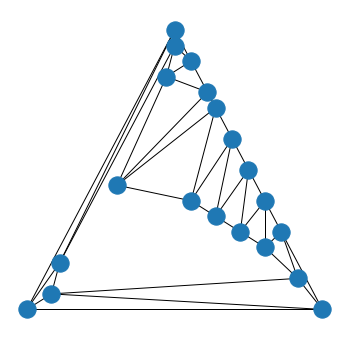

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_planar(g, ax=ax)

# Tantalo Algorithm

Note: Because it relies on line intersections in the cartesian plane, there is a bias towards faces of certains shape (I think since the line coordinates are chosen from R rather than Z).  e.g. for n = 4, it will always result in faces of side-lengths 4, 3, and 3 (even though faces of side lenghts 3 and 3 is theoretically also possible).

In [60]:
y = lambda x: x+3

In [65]:
lambda x: x+3

<function __main__.<lambda>(x)>

In [133]:
def generate_lines(n, plotting = False):
    slopes = [random.randint(-99999,99999) for i in range(n)]
    y_intercepts = [random.randint(-100,100) for i in range(n)]
    #funcs = [lambda x: x*slope + y_int for slope in slopes]
    x_range= np.linspace(-10,10,100)
    
    #coords = np.array([np.random.random(2)*10 for i in range(n+1)])

    if plotting == True:
        for i in range(n):
            y = slopes[i]*x_range + y_intercepts[i]
            plt.plot(x_range, y)
            plt.xlim(-100,100)
            plt.ylim(-100,100)
    print(slopes)
    print(y_intercepts)

In [102]:
n = 4
slopes = [random.randint(-50,50) for i in range(n)]
y_intercepts = [np.random.random()*100 for i in range(n)]

print(slopes, y_intercepts)

[17, 49, -39, -8] [81.81218875299608, 44.030700960345605, 5.732129016827825, 69.66153541751446]


[-35046, -57581, 44372, -16259]
[57, 87, 83, -51]


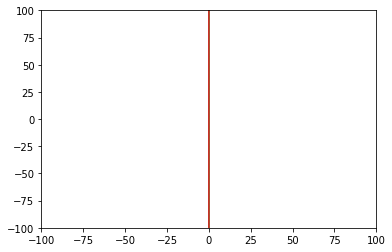

In [137]:
generate_lines(4, plotting=True)
    

In [ ]:
Input: a list L of n 2-dimensional lines, and a labeling A from each p in L to {1...n}

Let G be an empty graph.

Add vertices {1...n(n-1)/2} to G.

For each line p in L:
    Let M be the lines q in L ordered by the intersection points of p with q and p != q.
    For each consecutive pair Mi and Mi+1:
        Let u = PairIndex(A(p), A(Mi), n).
        Let v = PairIndex(A(p), A(Mi+1), n).
        Add an edge (u, v) to G.
Return G.

In [97]:
# class Line(obj):
#     def __init__(self, ):


def pair_index(p, q, n):
    #if 0 <= p < q <= n:
    if p >= q:
        return pair_index(p, q, n)
    return ((p)*(2*n-p-1)/2)+q-p
    
def planar_generator(n):
    lines = list(range(n))
    g = nx.Graph()
    num_v = int(n*(n-1)/2) - 1 #n choose 2, but -1 for appropriate indices
    g.add_nodes_from(list(range(num_v))) # might not need this line if appending edges later
    
    for a_p, p in enumerate(lines): #where vars starting w/ 'a_' are the line label/index
        m = lines; m.remove(p) #m is supposed to be ordered by the intersection points... how?
        for a_q, q in enumerate(m): 
            u = pair_index(a_p, a_q, n-1)
            v = pair_index(a_p, a_q+1, n-1)
            g.add_edge(u,v)
    return g

In [ ]:
gr = planar_generator(4)

In [ ]:
gr.edges()

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning:

arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.

/Users/brianbarry/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



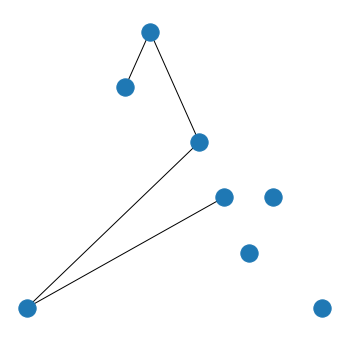

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_planar(gr, ax=ax)

#### This is me now translating JS planar generator to python

In [18]:
#Generates a random planar graph with *n* nodes.
def planarGraph(n): 
    points = []
    links = []
    i = -1
    j = None
    while (++i < n):
        points[i] = [random.random(), random.random()]
    
    i = -1 
    while (++i < n): 
        addPlanarLink([points[i], points[~~(Math.random() * n)]], links);

    i = -1
    while (++i < n): 
        j = i
        while (++j < n):
            addPlanarLink([points[i], points[j]], links)
  
    return {nodes: points, links: links}


#Adds a link if it doesn't intersect with anything.
def addPlanarLink(link, links): 
    for i in links:
        if not intersect(link, i):
            links.append(link)
    
#     if !links.some(
#             function(to) { return intersect(link, to); }
#         ) 
#         links.append(link)


#Returns true if two line segments intersect.
#Based on http:#stackoverflow.com/a/565282/64009

def intersect(a, b):
  # Check if the segments are exactly the same (or just reversed).
    if (a[0] == b[0] & a[1] == b[1] | a[0] == b[1] & a[1] == b[0]):
        return True

  # Represent the segments as p + tr and q + us, where t and u are scalar
  # parameters.
    p = a[0]
    r = [a[1][0] - p[0], a[1][1] - p[1]]
    q = b[0]
    s = [b[1][0] - q[0], b[1][1] - q[1]]

  # Solve p + tr = q + us to find an intersection point.
  # First, cross both sides with s:
  #   (p + tr) Ã— s = (q + us) Ã— s
  # We know that s Ã— s = 0, so this can be rewritten as:
  #   t(r Ã— s) = (q âˆ’ p) Ã— s
  # Then solve for t to get:
  #   t = (q âˆ’ p) Ã— s / (r Ã— s)
  # Similarly, for u we get:
  #   u = (q âˆ’ p) Ã— r / (r Ã— s)
    rxs = cross(r, s)
    q_p = [q[0] - p[0], q[1] - p[1]]
    t = cross(q_p, s) / rxs
    u = cross(q_p, r) / rxs
    epsilon = 1e-6

    return t > epsilon & t < 1 - epsilon & u > epsilon & u < 1 - epsilon;


def cross(a, b):
    return a[0] * b[1] - a[1] * b[0]


# Counting cycles

using DFS: https://www.geeksforgeeks.org/cycles-of-length-n-in-an-undirected-and-connected-graph/

What about using machine learning?